![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import backend as K

from livelossplot import PlotLossesKeras
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.metrics import MeanAbsoluteError, MeanSquaredError
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD

In [5]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


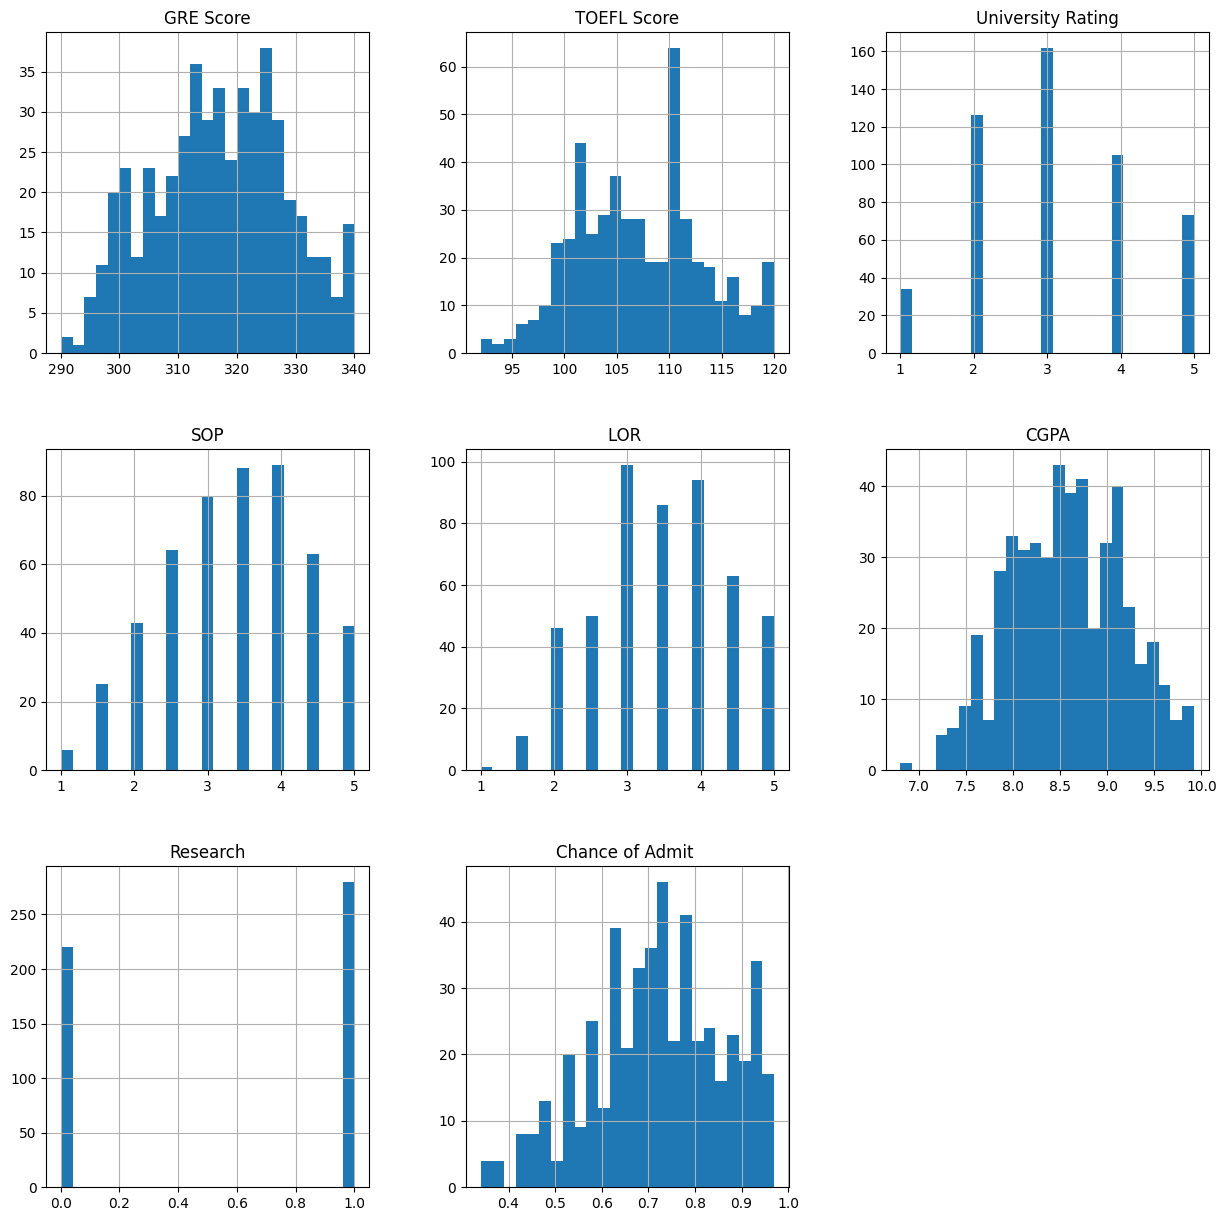

In [6]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [7]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [8]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

<p style="text-align: justify;">
Teniendo en cuenta que las redes neuronales son modelos sensibles a las escalas de las variables. Se usa StandardScaler para transformar las variables numéricas. En este contexto se excluye del escalamiento la variable binaria Research. Cabe resaltar que las variables categóricas University Rating, SOP y LOR. Sí fueron incluidas, dado que representan un orden lógico (1 es bajo y 5 es alto) y fueron tratadas como variables numéricas.<p>

In [9]:
# Normalización de los datos con StandardScaler
columns_scale = xTrain.drop(columns=['Research']).columns

scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain[columns_scale])
xTest_scaled = scaler.transform(xTest[columns_scale])

# Convertir el resultado en un DataFrame
xTrain_scaled = pd.DataFrame(xTrain_scaled, columns=columns_scale, index=xTrain.index)
xTest_scaled = pd.DataFrame(xTest_scaled, columns=columns_scale, index=xTest.index)

# Agragar la variable Reasearch al DataFrame
xTrain_scaled['Research'] = xTrain['Research']
xTest_scaled['Research'] = xTest['Research']

# Convertir los datos a numpy array para facilitar el uso en Keras y otras librerías
xTrain_scaled = np.array(xTrain_scaled)
xTest_scaled = np.array(xTest_scaled)
yTrain = np.array(yTrain)
yTest = np.array(yTest)

In [10]:
print(xTrain_scaled.shape)
print(xTest_scaled.shape)

(350, 7)
(150, 7)


In [11]:
output_var = yTrain.shape[0]
print(output_var, ' output variables')

350  output variables


In [12]:
dims = xTrain.shape[1]
print(dims, 'input variables')

7 input variables


## Punto 1 - Red Neuronal de una capa


En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

<p style="text-align: justify;">
Para el desarrollo de los puntos de 1 al 3 se resalta que usó diversas herramientas de inteligencia artificial, incluyendo Chat GPT y Copilot de forma que siriviera de validador y guía en la construcción de estos procedimientos.<p>

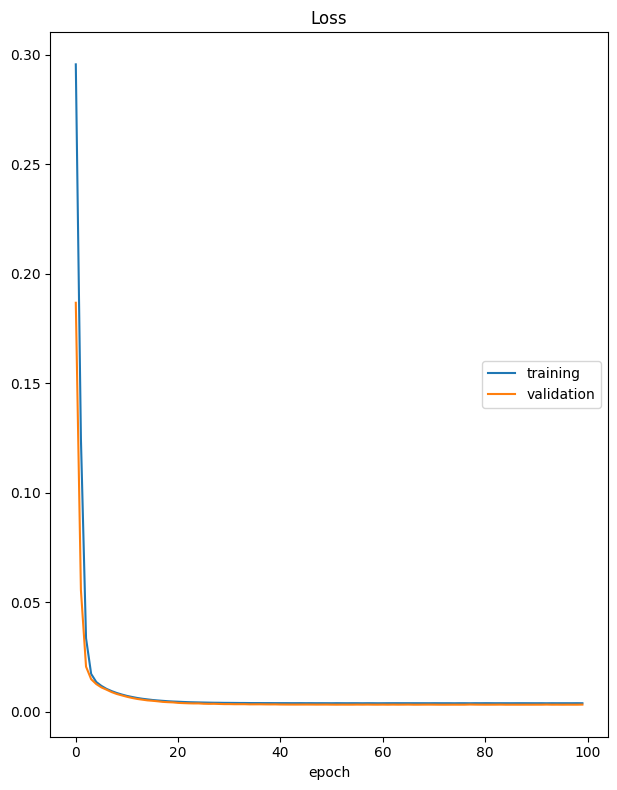

Loss
	training         	 (min:    0.004, max:    0.296, cur:    0.004)
	validation       	 (min:    0.003, max:    0.187, cur:    0.003)


In [13]:
#Tipo de red: Sequencial
modelo = Sequential()

# Definición de la capa
capa = Dense(units=1,                                                       # Numero de salidas
             input_dim=xTrain_scaled.shape[1],                              # Numero de columnas
             activation='relu',                                             # 
             kernel_initializer=initializers.RandomNormal(stddev=0.01),     # Inicializar pesos
             )
modelo.add(capa)

# Definición de la funcion de pérdida y optimizador
modelo.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01))

# Entrenamiento del modelo
RedKeras = modelo.fit(xTrain_scaled, yTrain, 
                      epochs=100, 
                      batch_size=10, 
                      verbose=0,
                      validation_data=(xTest_scaled, yTest),
                      callbacks=[PlotLossesKeras()]
                      )

En esta red neuronal de una sola capa, usamos como función de pérdida el MSE, el optimizador fue el Stochastic Gradient Descent (SGD) y entrenamos el modelo durante 100 épocas. Estos valores los decidimos basándonos en lo que aprendimos en clase y en lo que investigamos por nuestra cuenta.

Para la función de pérdida, escogimos el MSE porque es una forma común de medir qué tan bien está prediciendo nuestro modelo en problemas donde queremos predecir un número continuo, como en este caso la probabilidad de admisión. El MSE se estima calculando la diferencia entre la predicción y el valor real, y luego elevando esa diferencia al cuadrado. Esto es útil porque le da más peso a los errores grandes.

Para el optimizador, usamos Stochastic Gradient Descent (SGD). Por lo que investigamos, este método puede ser una buena opción cuando tenemos pocos datos para entrenar, como en nuestro caso (solo 350 datos de entrenamiento). El SGD funciona mirando cada dato de entrenamiento (uno por uno o en grupos) para decidir cómo ajustar los pesos. Esto lo hace más sencillo y rápido por cada paso en comparación con otros métodos que miran todos los datos a la vez.

Finalmente, decidimos entrenar durante 100 épocas. Una época significa que la red neuronal ha visto todos los datos de entrenamiento una vez. El número fue definido partiendo de una semilla de 300 épocas y luego observando que la convergencia se daba en un numero menor de épocas.

In [14]:
# Prediccion y evaluación del modelo
yPred_keras = modelo.predict(xTest_scaled)
mae_keras_1 = mean_absolute_error(yTest, yPred_keras)
mse_keras_1 = mean_squared_error(yTest, yPred_keras)

print('MAE usando Keras:', mae_keras_1)
print('MSE usando Keras:', mse_keras_1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
MAE usando Keras: 0.04100456635951996
MSE usando Keras: 0.0031588092446764656


## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [15]:
# Definición del modelo
K.clear_session()

#Tipo de red: Sequencial
model_2 = Sequential()

# Definición de las capas
model_2.add(
    Dense(units = 10,
           input_dim=dims,
             activation='relu',
               kernel_initializer='he_normal'
               )
    )

model_2.add(
    Dense(units = 5,
            activation='relu',
              kernel_initializer='he_normal'
              )
    )

model_2.add(Dense(1, activation='linear'))       

# Impresión de la arquitectura de la red neuronal
print(model_2.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141 (564.00 B)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [16]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_2.compile(optimizer=optimizers.Adam(learning_rate=0.01), loss='mean_squared_error', metrics=[MeanAbsoluteError(), MeanSquaredError()])
# model_2.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error', metrics=[MeanAbsoluteError(), MeanSquaredError()])

In [17]:
# Early stopping para evitar overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Entrenamiento del modelo con 100 epochs
history_2  = model_2.fit(
    xTrain_scaled, yTrain,
    validation_data=(xTest_scaled, yTest),
    epochs=100,
    batch_size=10,
    verbose=0,
    callbacks=[early_stop]
)

Esta red neuronal conta de dos capas ocultas, lo cual le permite detectar las realizacion no lineales con nayor facilidad que la red neuronal de una capa oculta. 

La primera capa oculta de la red esta conformada por 10 neuronas. El numero de neuronas para la primera capa oculta de una red neuronal debe ser ajsutado con base al numero de entradas que tenga el prblema. En este caso se tienen 7 variables input. Por tanto se obta por un numero ligeramente mayor a 7, ya que un numero excesivamente alto podria causar overfitting facilmente. 

La segunda capa oculta de la red normalmente tiene menos neuronas que la primera capa para evitar overfitting reduciendo la cantidad de parametros y esta estructura mejora la generalizacion del modelo. Por estas razones se definio un numero de 5 neuronas para la segunda capa.

El optimizador fue cambiado a "Adam" por su buen desempeño y convergencia superior a "SGD".

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
MAE usando Keras (2 capas): 0.0465115592956543
MSE usando Keras (2 capas): 0.0038120293400486747


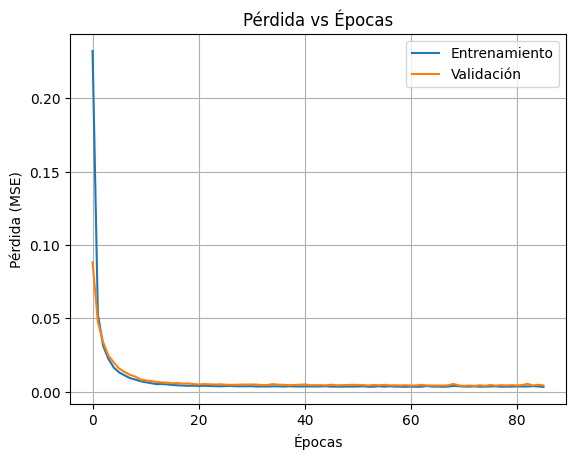

In [18]:
# Predicciones
yPred_keras = model_2.predict(xTest_scaled)

# Evaluación
mae_keras_2 = mean_absolute_error(yTest, yPred_keras)
mse_keras_2 = mean_squared_error(yTest, yPred_keras)

print('MAE usando Keras (2 capas):', mae_keras_2)
print('MSE usando Keras (2 capas):', mse_keras_2)

# Graficar pérdida
plt.plot(history_2.history['loss'], label='Entrenamiento')
plt.plot(history_2.history['val_loss'], label='Validación')
plt.title('Pérdida vs Épocas')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.grid(True)
plt.show()

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [19]:
K.clear_session()
# Definición de la red neuronal con la función Sequential
model_3 = Sequential()

# Definición de las capas
model_3.add(
    Dense(units = 10,
           input_dim=dims,
             activation='relu',
               kernel_initializer='he_normal'
               )
    )
model_3.add(Dropout(0.1))

model_3.add(
    Dense(units = 5,
            activation='relu',
              kernel_initializer='he_normal'
              )
    )
model_3.add(Dropout(0.1))

model_3.add(Dense(1, activation='linear')) 

# Impresión de la arquitectura de la red neuronal
print(model_3.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141 (564.00 B)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [20]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_3.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[MeanAbsoluteError(), MeanSquaredError()])
# model_3.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error', metrics=[MeanAbsoluteError(), MeanSquaredError()])

In [21]:
# Early stopping para evitar overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history_3 = model_3.fit(
    xTrain_scaled, yTrain, 
    validation_data=(xTest_scaled, yTest),
    epochs=100,
    batch_size=10,
    verbose=0,
    callbacks=[early_stop]
)

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002AA775B6DE0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
MAE con Dropout y EarlyStopping: 0.06568656619389852
MSE con Dropout y EarlyStopping: 0.008122754691609215


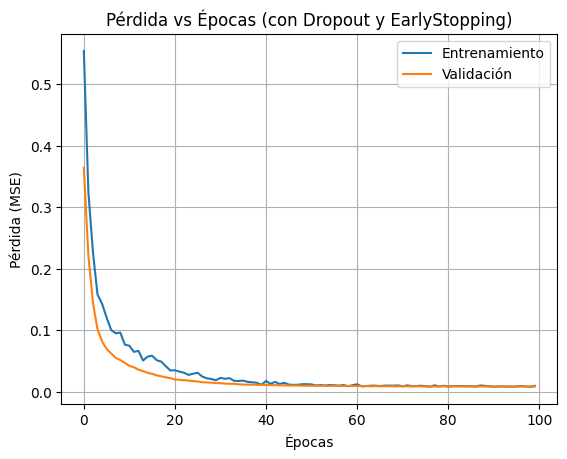

In [22]:
# Predicciones
yPred_keras = model_3.predict(xTest_scaled)

# Evaluación
mae_keras_3 = mean_absolute_error(yTest, yPred_keras)
mse_keras_3 = mean_squared_error(yTest, yPred_keras)

print('MAE con Dropout y EarlyStopping:', mae_keras_3)
print('MSE con Dropout y EarlyStopping:', mse_keras_3)

# Gráfica de pérdida
plt.plot(history_3.history['loss'], label='Entrenamiento')
plt.plot(history_3.history['val_loss'], label='Validación')
plt.title('Pérdida vs Épocas (con Dropout y EarlyStopping)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.grid(True)
plt.show()

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

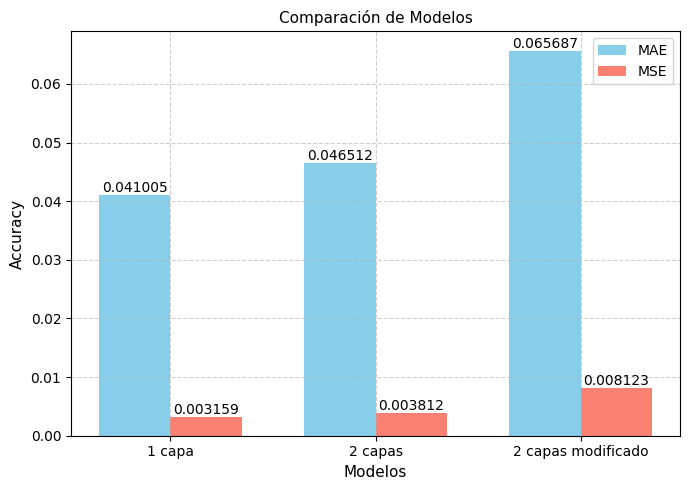

In [25]:
mae_values = {
    "1 capa": mae_keras_1,
    "2 capas": mae_keras_2,
    "2 capas modificado": mae_keras_3
}

mse_values = {
    "1 capa": mse_keras_1,
    "2 capas": mse_keras_2,
    "2 capas modificado": mse_keras_3
}


fig, ax = plt.subplots(figsize=(7, 5))

labels = list(mae_values.keys())
x = np.arange(len(labels))  # posiciones en el eje X
purple_color = '#800080' # Color púrpura
width = 0.35  # ancho de las barras

# Gráfico: Comparar modelos por MSE
bars1 = ax.bar(x - width/2, mae_values.values(), width, label='MAE', color='skyblue')
bars2 = ax.bar(x + width/2, mse_values.values(), width, label='MSE', color='salmon')
ax.set_title('Comparación de Modelos', fontsize=11)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Modelos', fontsize=11)
ax.set_ylabel('Accuracy', fontsize=11)
ax.grid(True, linestyle='--', alpha=0.6)

# Mostrar el valor arriba de cada barra
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.6f}', 
            ha='center', va='bottom', fontsize=10)

# Ajustes finales
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Crear y entrenar el modelo
modelo_lineal = LinearRegression()
modelo_lineal.fit(xTrain_scaled, yTrain)

# Predicción
yPred_lineal = modelo_lineal.predict(xTest_scaled)

# Cálculo de métricas
mae_lineal = mean_absolute_error(yTest, yPred_lineal)
mse_lineal = mean_squared_error(yTest, yPred_lineal)

print('MAE modelo lineal:', mae_lineal)
print('MSE modelo lineal:', mse_lineal)

MAE modelo lineal: 0.04090683793611622
MSE modelo lineal: 0.0031172663433275123


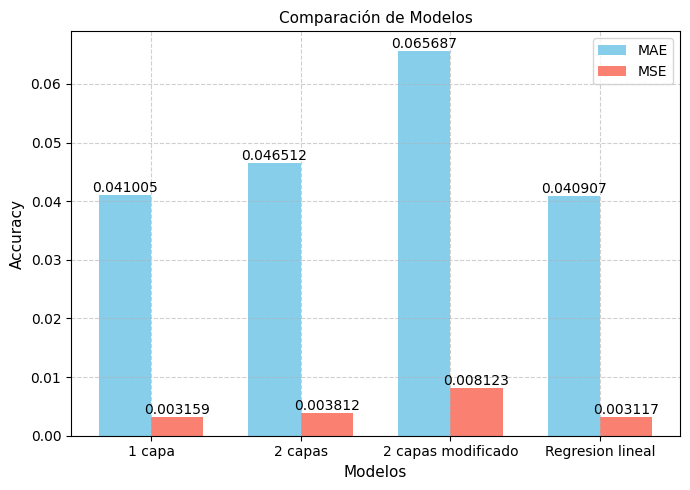

In [27]:
mae_values = {
    "1 capa": mae_keras_1,
    "2 capas": mae_keras_2,
    "2 capas modificado": mae_keras_3,
    "Regresion lineal": mae_lineal
}

mse_values = {
    "1 capa": mse_keras_1,
    "2 capas": mse_keras_2,
    "2 capas modificado": mse_keras_3,
    "Regresion lineal": mse_lineal
}


fig, ax = plt.subplots(figsize=(7, 5))

labels = list(mae_values.keys())
x = np.arange(len(labels))  # posiciones en el eje X
purple_color = '#800080' # Color púrpura
width = 0.35  # ancho de las barras

# Gráfico: Comparar modelos por MSE
bars1 = ax.bar(x - width/2, mae_values.values(), width, label='MAE', color='skyblue')
bars2 = ax.bar(x + width/2, mse_values.values(), width, label='MSE', color='salmon')
ax.set_title('Comparación de Modelos', fontsize=11)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Modelos', fontsize=11)
ax.set_ylabel('Accuracy', fontsize=11)
ax.grid(True, linestyle='--', alpha=0.6)

# Mostrar el valor arriba de cada barra
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.6f}', 
            ha='center', va='bottom', fontsize=10)

# Ajustes finales
plt.legend()
plt.tight_layout()
plt.show()

#### Conclusiones

- Las redes neuronales son ampliamente utilizadas para captural la naturaleza compleja de los proplemas de prediccion. Por tal razon a medida que se sofistifica una red neuronal está poseerá mayor poder de prediccion para problemas complejos. El numero de capas ocultas, neuronas y parametros como la tasa de aprendizasje puede afectar en gran manera el desempeño de una red neuronal.

- La primera red neuronal tiene un mejor desempeño que las demás redes. Por tanto se comparo con un modelo de regresion lineal. Al tener un desempeño similar se concluye que la naturaleza del problema es lineal y simple. Las ventajas que poseen las demas redes no fueron utiles para este caso debido a su naturaleza. El numero de neuronas y de capas está causando overfitting a los modelos, por otra parte el dropout hace perder informacion relevante ya que el tamaño del modelo es pequeño.

- La tercera red neuronal que tiene 2 capas ocultas y se aplicaron procesos de early stopping y dropout tuvo el peor desempeño. Esto puede deberse a que el modelo produce overfitting por la naturaleza simple del problema. Las diferencias son minima, sin embargo, el comportamiento de la funcion de perdida para las redes neuronales de dos capas posee mayor variabilidad. Adicional la diferencia entre la segunda y tecera es el dropout, proceso el cual puede omitir informacion del modelo.